In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

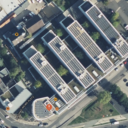

In [2]:
# load image from data/img
img = Image.open('../data/imgs/tza.png')
img


In [3]:
img = torch.tensor(np.array(img)).permute(2, 0, 1).unsqueeze(0).float()
img.shape

torch.Size([1, 3, 128, 128])

In [4]:
def viz_img_pytorch(img):
    img = img.detach().squeeze().permute(1,2,0)/255.0
    plt.imshow(img)
    plt.show()

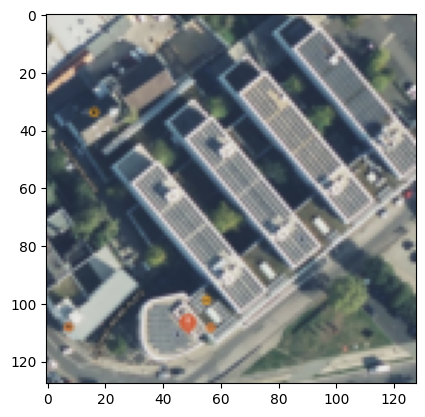

In [5]:
conv = nn.Conv2d(3, 64, 5, padding="same")
viz_img_pytorch(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


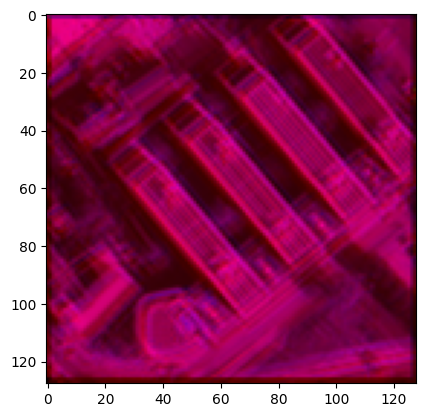

In [6]:
img_conv = conv(img)
shift = 4
viz_img_pytorch(img_conv[:,shift:shift+3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


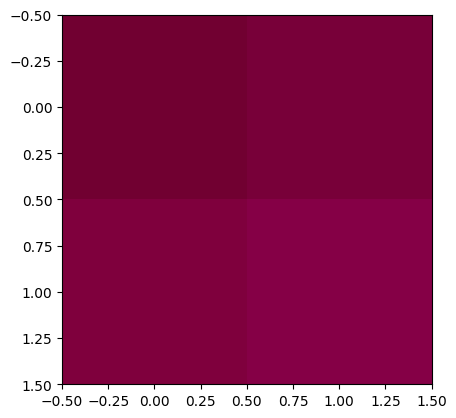

In [7]:
m = nn.AdaptiveAvgPool2d((2))
input = img_conv
output = m(input)
viz_img_pytorch(output[:,shift:shift+3])

In [8]:
n=1
for x in output.shape:
    n *= x
n, output.shape

(256, torch.Size([1, 64, 2, 2]))

In [9]:
output.view(img.size(0), -1).size()

torch.Size([1, 256])